In [2]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import pydot
import seaborn as sns


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [4]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
 y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

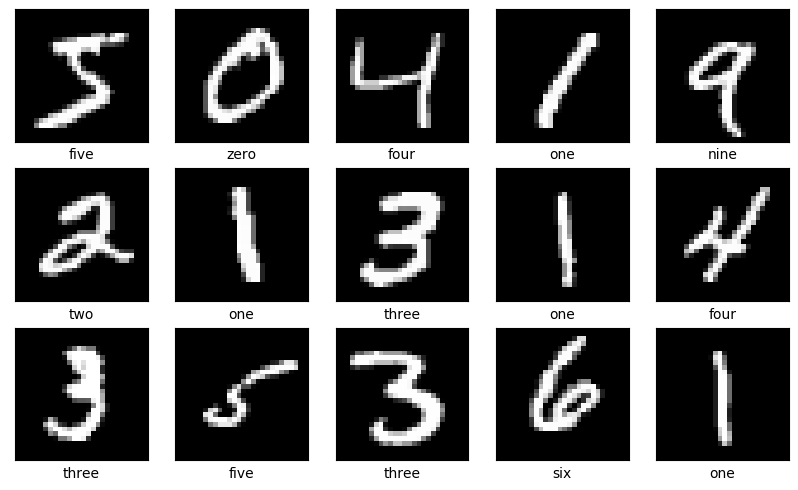

In [6]:
columnNames=['zero','one','two','three','four','five','six','seven','eight','nine']
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i],cmap='gray')
    plt.xlabel(columnNames[y_train_digit[i]])
plt.show()

In [7]:
 X_train_digit.shape

(60000, 28, 28)

In [8]:
X_train_digit=X_train_digit.reshape(60000,784)
X_test_digit=X_test_digit.reshape(10000,784)

In [9]:
 X_train_digit.shape

(60000, 784)

In [10]:
y_test_digit.shape

(10000,)

In [11]:
y_train_digit=to_categorical(y_train_digit,num_classes=10)
y_test_digit=to_categorical(y_test_digit,num_classes=10)

In [12]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
model=keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [16]:
history=model.fit(X_train_digit, y_train_digit,batch_size=100,epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 20s 24ms/step - loss: 1.4229 - accuracy: 0.8547 - val_loss: 0.3218 - val_accuracy: 0.9223
Epoch 2/10
600/600 [==============================] - 14s 23ms/step - loss: 0.2590 - accuracy: 0.9333 - val_loss: 0.2312 - val_accuracy: 0.9420
Epoch 3/10
600/600 [==============================] - 14s 24ms/step - loss: 0.1691 - accuracy: 0.9532 - val_loss: 0.2288 - val_accuracy: 0.9458
Epoch 4/10
600/600 [==============================] - 13s 21ms/step - loss: 0.1273 - accuracy: 0.9633 - val_loss: 0.2049 - val_accuracy: 0.9510
Epoch 5/10
600/600 [==============================] - 14s 24ms/step - loss: 0.1179 - accuracy: 0.9662 - val_loss: 0.1780 - val_accuracy: 0.9518
Epoch 6/10
600/600 [==============================] - 14s 24ms/step - loss: 0.1033 - accuracy: 0.9699 - val_loss: 0.2168 - val_accuracy: 0.9467
Epoch 7/10
600/600 [==============================] - 15s 24ms/step - loss: 0.0926 - accuracy: 0.9732 - val_loss: 0.1366 - val_accuracy:

In [17]:
y_predict = model.predict(X_test_digit)


313/313 [==============================] - 2s 6ms/step


In [18]:
y_predict[0]

array([9.9791193e-01, 9.9858707e-01, 1.0000000e+00, 9.9999988e-01,
       6.6336203e-01, 9.9995458e-01, 4.5133580e-04, 1.0000000e+00,
       9.9997109e-01, 9.9818414e-01], dtype=float32)

In [19]:
y_predicts=np.argmax(y_predict, axis=1) 
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [20]:
y_predicts

array([2, 1, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

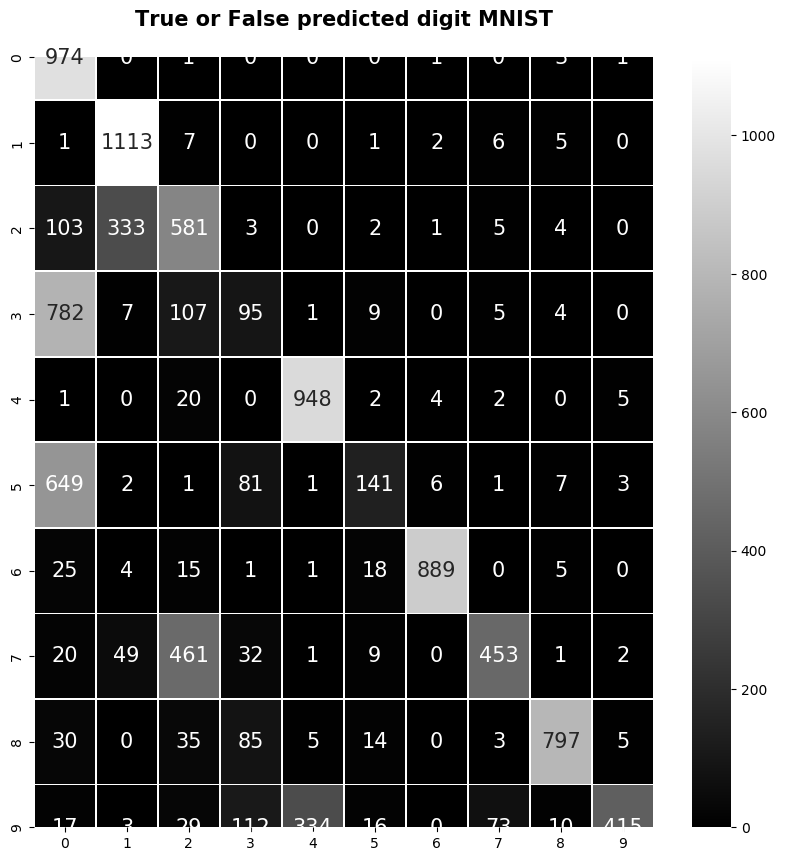

In [22]:
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.37      0.99      0.54       980
           1       0.74      0.98      0.84      1135
           2       0.46      0.56      0.51      1032
           3       0.23      0.09      0.13      1010
           4       0.73      0.97      0.83       982
           5       0.67      0.16      0.26       892
           6       0.98      0.93      0.96       958
           7       0.83      0.44      0.57      1028
           8       0.95      0.82      0.88       974
           9       0.96      0.41      0.58      1009

    accuracy                           0.64     10000
   macro avg       0.69      0.64      0.61     10000
weighted avg       0.69      0.64      0.61     10000



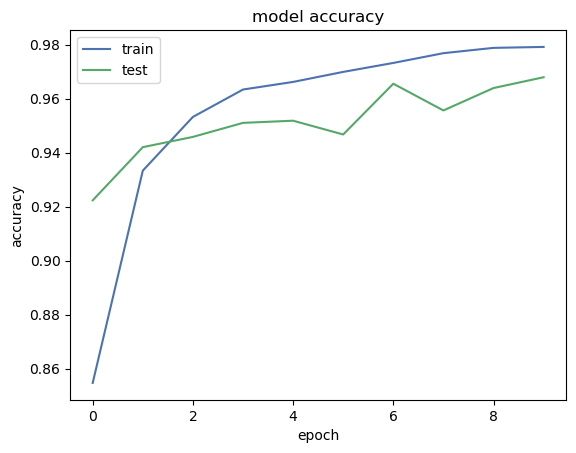

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

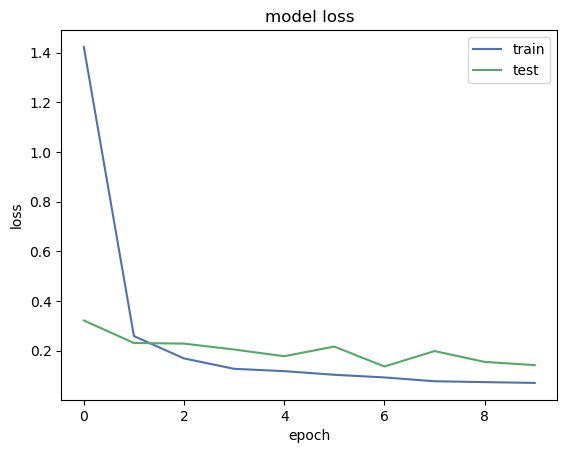

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [26]:
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) 
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 [==============================] - 0s 94ms/step


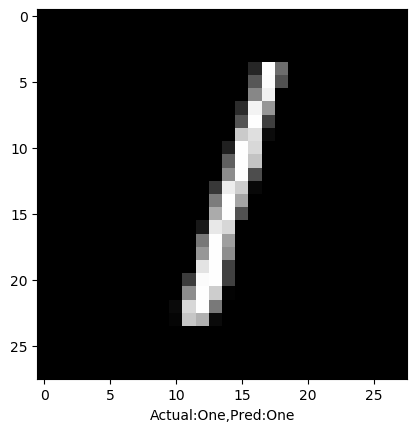

In [27]:
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']


plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

In [28]:
y_test_digit[7]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)